**1. Анализ расходов и выявление аномальных транзакций**

Генерируем случайные транзакции с разными суммами:

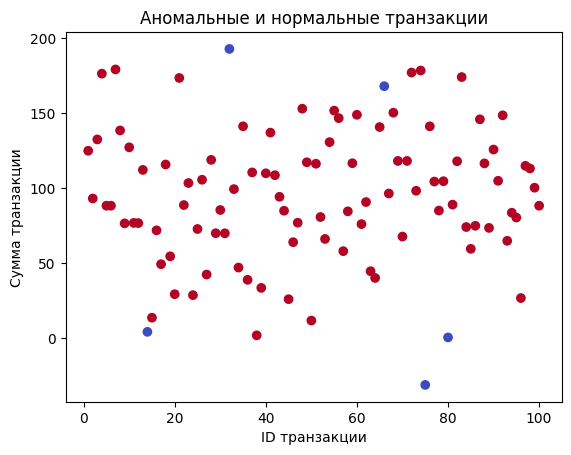

Аномальные транзакции:
    Transaction_ID      Amount  Anomaly
13              14    4.335988       -1
31              32  192.613909       -1
65              66  167.812001       -1
74              75  -30.987255       -1
79              80    0.621554       -1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Генерация случайных данных о транзакциях
np.random.seed(42)
data = pd.DataFrame({
    'Transaction_ID': np.arange(1, 101),
    'Amount': np.random.normal(loc=100, scale=50, size=100)  # среднее = 100, стандартное отклонение = 50
})

# Используем IsolationForest для обнаружения аномалий
model = IsolationForest(contamination=0.05)  # предположим, что 5% транзакций аномальные
model.fit(data[['Amount']])
data['Anomaly'] = model.predict(data[['Amount']])

# Визуализация аномальных и нормальных транзакций
plt.scatter(data['Transaction_ID'], data['Amount'], c=data['Anomaly'], cmap='coolwarm')
plt.title('Аномальные и нормальные транзакции')
plt.xlabel('ID транзакции')
plt.ylabel('Сумма транзакции')
plt.show()

# Вывод аномальных транзакций
anomalies = data[data['Anomaly'] == -1]
print("Аномальные транзакции:")
print(anomalies)

Генерация данных:
**Текст, выделенный полужирным шрифтом**
Здесь сгенерированы случайные транзакции с использованием нормального распределения (средняя сумма 100, стандартное отклонение 50). IsolationForest помогает обнаруживать аномальные транзакции, которые значительно отличаются от остальных.

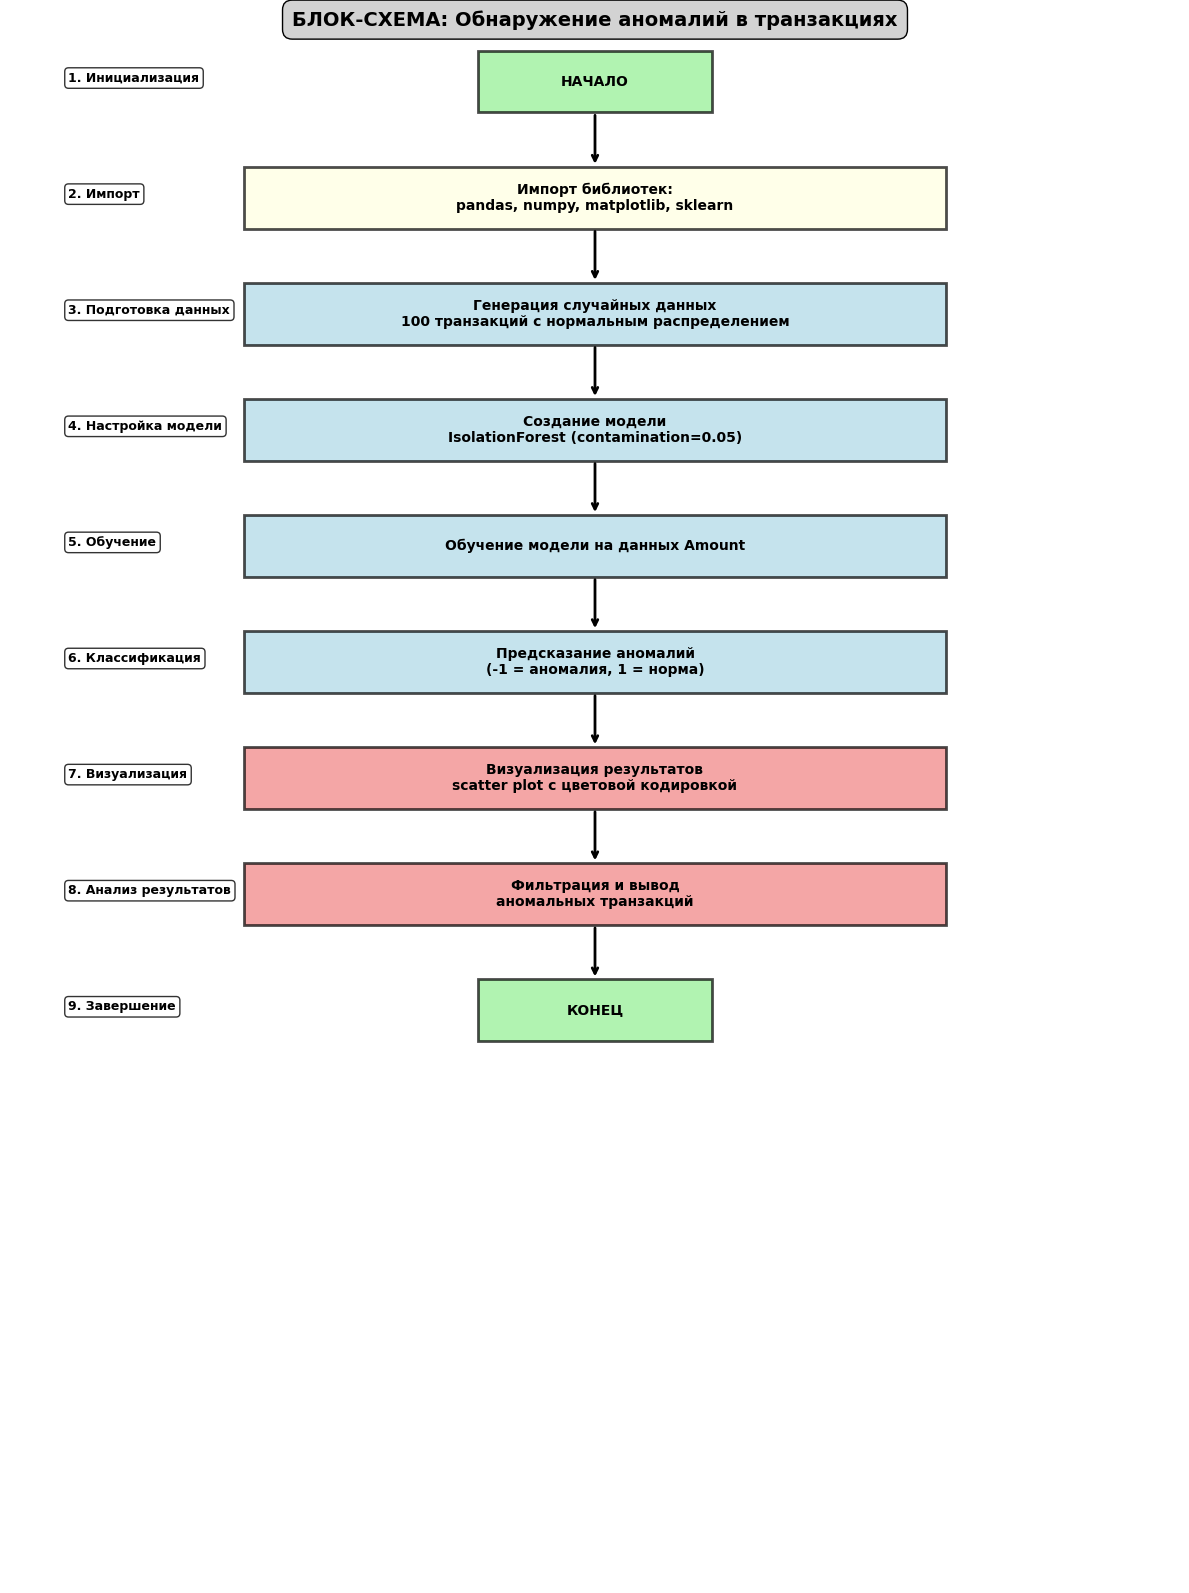

ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ
1. [НАЧАЛО]
   ↓
2. Импорт библиотек:
   - pandas as pd
   - numpy as np
   - matplotlib.pyplot as plt
   - sklearn.ensemble.IsolationForest
   ↓
3. Генерация тестовых данных:
   - 100 транзакций
   - Нормальное распределение (μ=100, σ=50)
   ↓
4. Создание модели IsolationForest:
   - contamination = 0.05 (5% аномалий)
   ↓
5. Обучение модели:
   - model.fit(data[['Amount']])
   ↓
6. Предсказание аномалий:
   - model.predict() → -1/1
   - Добавление столбца 'Anomaly'
   ↓
7. Визуализация:
   - scatter plot транзакций
   - Цветовая кодировка аномалий
   ↓
8. Анализ результатов:
   - Фильтрация аномальных транзакций
   - Вывод в консоль
   ↓
9. [КОНЕЦ]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создание фигуры и оси
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.axis('off')

# Функция для добавления блоков
def add_block(x, y, width, height, text, shape='rectangle', color='lightblue'):
    if shape == 'rectangle':
        rect = patches.Rectangle((x, y), width, height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
    elif shape == 'diamond':
        diamond = patches.RegularPolygon((x + width/2, y + height/2), 4, height/2,
                                       linewidth=2, edgecolor='black',
                                       facecolor=color, alpha=0.7)
        ax.add_patch(diamond)

    # Добавление текста
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=10, fontweight='bold')

# Функция для добавления стрелок
def add_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Блоки блок-схемы
blocks = [
    # Начало
    (4, 19, 2, 0.8, 'НАЧАЛО', 'rectangle', 'lightgreen'),

    # Импорт библиотек
    (2, 17.5, 6, 0.8, 'Импорт библиотек:\npandas, numpy, matplotlib, sklearn', 'rectangle', 'lightyellow'),

    # Генерация данных
    (2, 16, 6, 0.8, 'Генерация случайных данных\n100 транзакций с нормальным распределением', 'rectangle', 'lightblue'),

    # Создание модели
    (2, 14.5, 6, 0.8, 'Создание модели\nIsolationForest (contamination=0.05)', 'rectangle', 'lightblue'),

    # Обучение модели
    (2, 13, 6, 0.8, 'Обучение модели на данных Amount', 'rectangle', 'lightblue'),

    # Предсказание аномалий
    (2, 11.5, 6, 0.8, 'Предсказание аномалий\n(-1 = аномалия, 1 = норма)', 'rectangle', 'lightblue'),

    # Визуализация
    (2, 10, 6, 0.8, 'Визуализация результатов\nscatter plot с цветовой кодировкой', 'rectangle', 'lightcoral'),

    # Вывод аномалий
    (2, 8.5, 6, 0.8, 'Фильтрация и вывод\nаномальных транзакций', 'rectangle', 'lightcoral'),

    # Конец
    (4, 7, 2, 0.8, 'КОНЕЦ', 'rectangle', 'lightgreen'),
]

# Добавление блоков
for block in blocks:
    add_block(*block)

# Добавление стрелок
arrows = [
    # Вертикальные стрелки
    (5, 19, 5, 18.3),    # Начало -> Импорт
    (5, 17.5, 5, 16.8),  # Импорт -> Генерация
    (5, 16, 5, 15.3),    # Генерация -> Создание модели
    (5, 14.5, 5, 13.8),  # Создание -> Обучение
    (5, 13, 5, 12.3),    # Обучение -> Предсказание
    (5, 11.5, 5, 10.8),  # Предсказание -> Визуализация
    (5, 10, 5, 9.3),     # Визуализация -> Вывод
    (5, 8.5, 5, 7.8),    # Вывод -> Конец
]

for arrow in arrows:
    add_arrow(*arrow)

# Добавление подписей этапов
stages = [
    (0.5, 19.4, '1. Инициализация'),
    (0.5, 17.9, '2. Импорт'),
    (0.5, 16.4, '3. Подготовка данных'),
    (0.5, 14.9, '4. Настройка модели'),
    (0.5, 13.4, '5. Обучение'),
    (0.5, 11.9, '6. Классификация'),
    (0.5, 10.4, '7. Визуализация'),
    (0.5, 8.9, '8. Анализ результатов'),
    (0.5, 7.4, '9. Завершение'),
]

for stage in stages:
    ax.text(stage[0], stage[1], stage[2], fontsize=9, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Заголовок
ax.text(5, 20.2, 'БЛОК-СХЕМА: Обнаружение аномалий в транзакциях',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: текстовая блок-схема
print("=" * 60)
print("ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ")
print("=" * 60)
print("1. [НАЧАЛО]")
print("   ↓")
print("2. Импорт библиотек:")
print("   - pandas as pd")
print("   - numpy as np")
print("   - matplotlib.pyplot as plt")
print("   - sklearn.ensemble.IsolationForest")
print("   ↓")
print("3. Генерация тестовых данных:")
print("   - 100 транзакций")
print("   - Нормальное распределение (μ=100, σ=50)")
print("   ↓")
print("4. Создание модели IsolationForest:")
print("   - contamination = 0.05 (5% аномалий)")
print("   ↓")
print("5. Обучение модели:")
print("   - model.fit(data[['Amount']])")
print("   ↓")
print("6. Предсказание аномалий:")
print("   - model.predict() → -1/1")
print("   - Добавление столбца 'Anomaly'")
print("   ↓")
print("7. Визуализация:")
print("   - scatter plot транзакций")
print("   - Цветовая кодировка аномалий")
print("   ↓")
print("8. Анализ результатов:")
print("   - Фильтрация аномальных транзакций")
print("   - Вывод в консоль")
print("   ↓")
print("9. [КОНЕЦ]")

# **Библиотеки:**

**pandas** -

**numpy** -



**2. Анализ отчетов о прибылях и убытках для выявления трендов**

Генерация случайных финансовых отчетов компании по годам:

**Решение:**

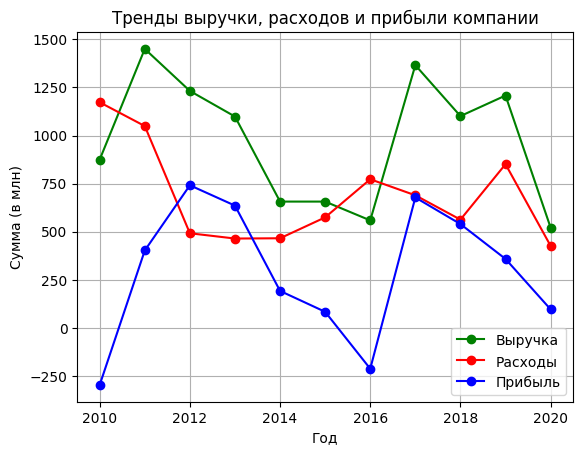

In [ ]:
# Генерация данных по годам
np.random.seed(42) #
years = np.arange(2010, 2021)
data = pd.DataFrame({
    'Year': years,
    'Revenue': np.random.uniform(500, 1500, len(years)),  # случайная выручка в диапазоне от 500 до 1500 млн
    'Expenses': np.random.uniform(300, 1200, len(years)),  # случайные расходы в диапазоне от 300 до 1200 млн
})

# Расчет прибыли
data['Profit'] = data['Revenue'] - data['Expenses']

# Визуализация трендов
plt.plot(data['Year'], data['Revenue'], label='Выручка', color='green', marker='o')
plt.plot(data['Year'], data['Expenses'], label='Расходы', color='red', marker='o')
plt.plot(data['Year'], data['Profit'], label='Прибыль', color='blue', marker='o')

plt.title('Тренды выручки, расходов и прибыли компании')
plt.xlabel('Год')
plt.ylabel('Сумма (в млн)')
plt.legend()
plt.grid(True)
plt.show()

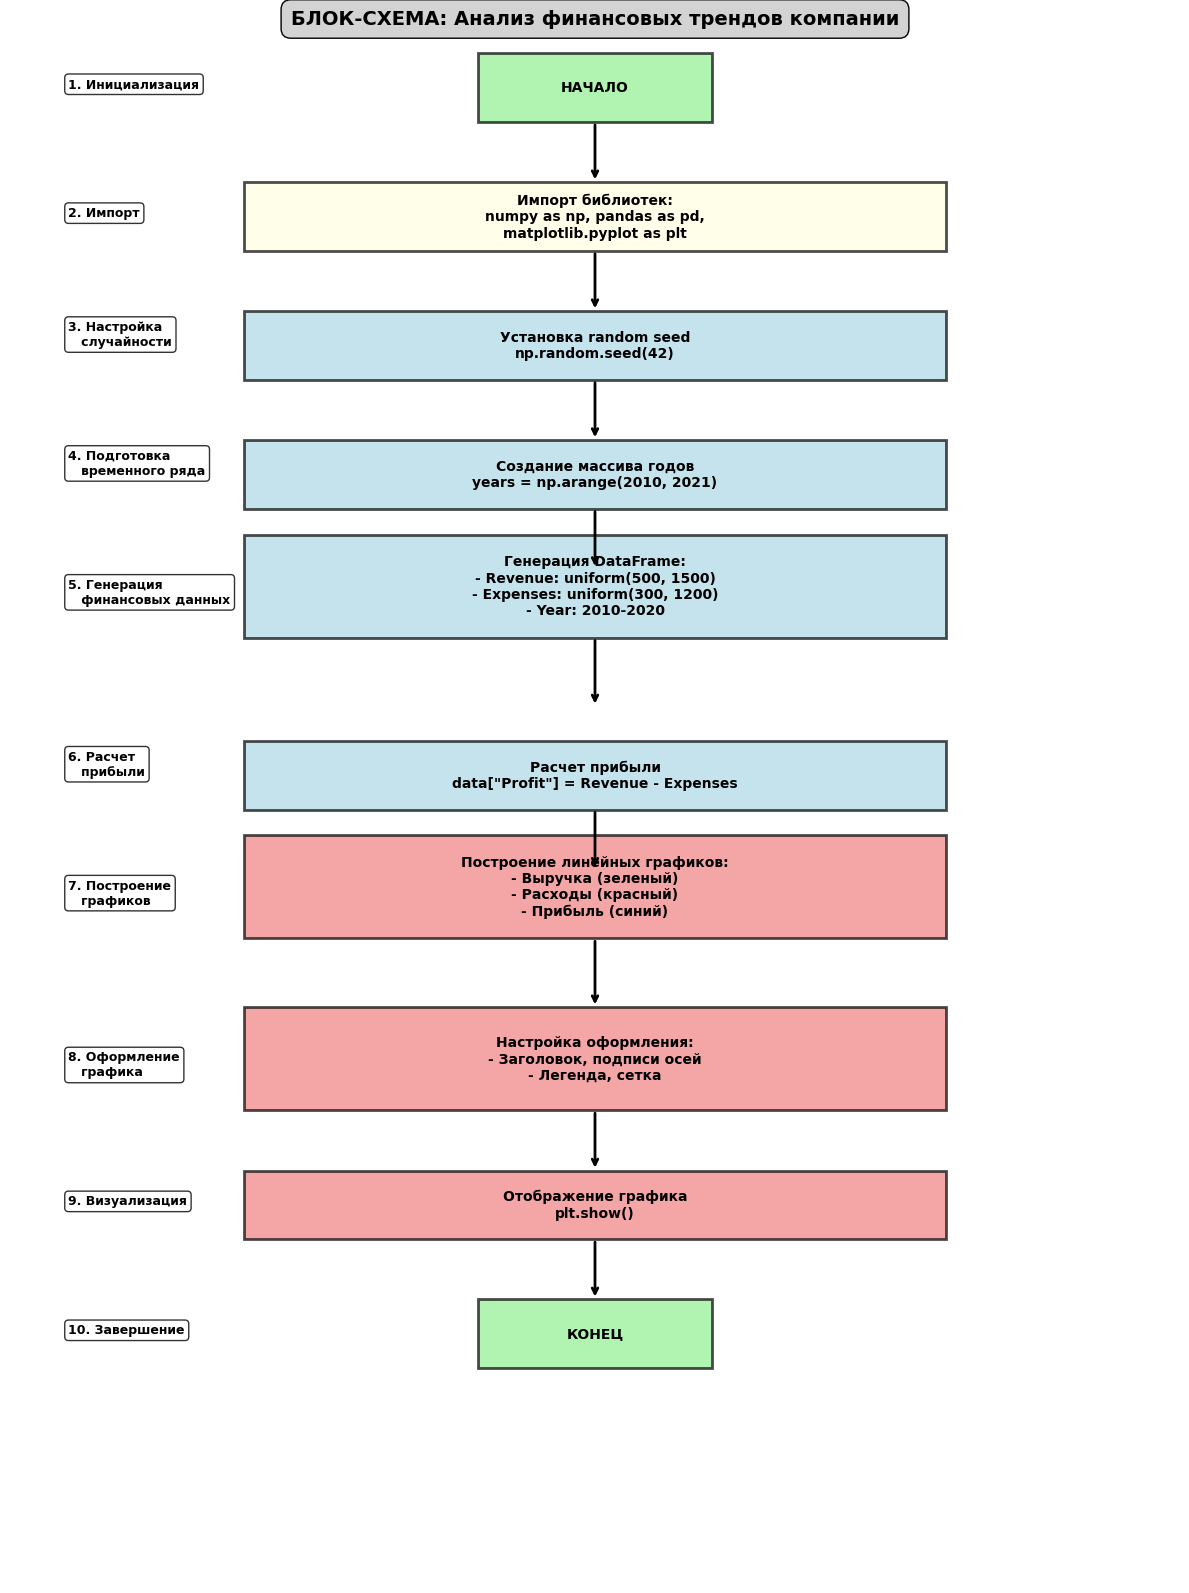

ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ
1. [НАЧАЛО]
   ↓
2. Импорт библиотек:
   - numpy as np
   - pandas as pd
   - matplotlib.pyplot as plt
   ↓
3. Установка random seed:
   - np.random.seed(42) для воспроизводимости
   ↓
4. Создание временного ряда:
   - years = np.arange(2010, 2021)
   - Период: 2010-2020 (11 лет)
   ↓
5. Генерация финансовых данных:
   - Revenue: равномерное распределение [500, 1500]
   - Expenses: равномерное распределение [300, 1200]
   - Создание DataFrame с годами
   ↓
6. Расчет прибыли:
   - data['Profit'] = Revenue - Expenses
   - Добавление нового столбца в DataFrame
   ↓
7. Построение линейных графиков:
   - Выручка: зеленый цвет с маркерами
   - Расходы: красный цвет с маркерами
   - Прибыль: синий цвет с маркерами
   ↓
8. Настройка оформления графика:
   - Заголовок: 'Тренды выручки, расходов и прибыли компании'
   - Подписи осей X и Y
   - Легенда и сетка
   ↓
9. Отображение графика:
   - plt.show()
   - Визуализация всех трех показателей
   ↓
10. [КОНЕЦ]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создание фигуры и оси
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.set_xlim(0, 10)
ax.set_ylim(0, 18)
ax.axis('off')

# Функция для добавления блоков
def add_block(x, y, width, height, text, shape='rectangle', color='lightblue'):
    if shape == 'rectangle':
        rect = patches.Rectangle((x, y), width, height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
    elif shape == 'diamond':
        diamond = patches.RegularPolygon((x + width/2, y + height/2), 4, height/2,
                                       linewidth=2, edgecolor='black',
                                       facecolor=color, alpha=0.7)
        ax.add_patch(diamond)

    # Добавление текста
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=10, fontweight='bold')

# Функция для добавления стрелок
def add_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Блоки блок-схемы
blocks = [
    # Начало
    (4, 17, 2, 0.8, 'НАЧАЛО', 'rectangle', 'lightgreen'),

    # Импорт библиотек (предполагается)
    (2, 15.5, 6, 0.8, 'Импорт библиотек:\nnumpy as np, pandas as pd,\nmatplotlib.pyplot as plt', 'rectangle', 'lightyellow'),

    # Установка seed
    (2, 14, 6, 0.8, 'Установка random seed\nnp.random.seed(42)', 'rectangle', 'lightblue'),

    # Генерация лет
    (2, 12.5, 6, 0.8, 'Создание массива годов\nyears = np.arange(2010, 2021)', 'rectangle', 'lightblue'),

    # Генерация данных
    (2, 11, 6, 1.2, 'Генерация DataFrame:\n- Revenue: uniform(500, 1500)\n- Expenses: uniform(300, 1200)\n- Year: 2010-2020', 'rectangle', 'lightblue'),

    # Расчет прибыли
    (2, 9, 6, 0.8, 'Расчет прибыли\ndata["Profit"] = Revenue - Expenses', 'rectangle', 'lightblue'),

    # Построение графиков
    (2, 7.5, 6, 1.2, 'Построение линейных графиков:\n- Выручка (зеленый)\n- Расходы (красный)\n- Прибыль (синий)', 'rectangle', 'lightcoral'),

    # Настройка графика
    (2, 5.5, 6, 1.2, 'Настройка оформления:\n- Заголовок, подписи осей\n- Легенда, сетка', 'rectangle', 'lightcoral'),

    # Отображение графика
    (2, 4, 6, 0.8, 'Отображение графика\nplt.show()', 'rectangle', 'lightcoral'),

    # Конец
    (4, 2.5, 2, 0.8, 'КОНЕЦ', 'rectangle', 'lightgreen'),
]

# Добавление блоков
for block in blocks:
    add_block(*block)

# Добавление стрелок
arrows = [
    # Вертикальные стрелки
    (5, 17, 5, 16.3),    # Начало -> Импорт
    (5, 15.5, 5, 14.8),  # Импорт -> Seed
    (5, 14, 5, 13.3),    # Seed -> Годы
    (5, 12.5, 5, 11.8),  # Годы -> Генерация данных
    (5, 11, 5, 10.2),    # Генерация -> Расчет прибыли
    (5, 9, 5, 8.3),      # Прибыль -> Построение
    (5, 7.5, 5, 6.7),    # Построение -> Настройка
    (5, 5.5, 5, 4.8),    # Настройка -> Отображение
    (5, 4, 5, 3.3),      # Отображение -> Конец
]

for arrow in arrows:
    add_arrow(*arrow)

# Добавление подписей этапов
stages = [
    (0.5, 17.4, '1. Инициализация'),
    (0.5, 15.9, '2. Импорт'),
    (0.5, 14.4, '3. Настройка\n   случайности'),
    (0.5, 12.9, '4. Подготовка\n   временного ряда'),
    (0.5, 11.4, '5. Генерация\n   финансовых данных'),
    (0.5, 9.4, '6. Расчет\n   прибыли'),
    (0.5, 7.9, '7. Построение\n   графиков'),
    (0.5, 5.9, '8. Оформление\n   графика'),
    (0.5, 4.4, '9. Визуализация'),
    (0.5, 2.9, '10. Завершение'),
]

for stage in stages:
    ax.text(stage[0], stage[1], stage[2], fontsize=9, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Заголовок
ax.text(5, 18.2, 'БЛОК-СХЕМА: Анализ финансовых трендов компании',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: текстовая блок-схема
print("=" * 60)
print("ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ")
print("=" * 60)
print("1. [НАЧАЛО]")
print("   ↓")
print("2. Импорт библиотек:")
print("   - numpy as np")
print("   - pandas as pd")
print("   - matplotlib.pyplot as plt")
print("   ↓")
print("3. Установка random seed:")
print("   - np.random.seed(42) для воспроизводимости")
print("   ↓")
print("4. Создание временного ряда:")
print("   - years = np.arange(2010, 2021)")
print("   - Период: 2010-2020 (11 лет)")
print("   ↓")
print("5. Генерация финансовых данных:")
print("   - Revenue: равномерное распределение [500, 1500]")
print("   - Expenses: равномерное распределение [300, 1200]")
print("   - Создание DataFrame с годами")
print("   ↓")
print("6. Расчет прибыли:")
print("   - data['Profit'] = Revenue - Expenses")
print("   - Добавление нового столбца в DataFrame")
print("   ↓")
print("7. Построение линейных графиков:")
print("   - Выручка: зеленый цвет с маркерами")
print("   - Расходы: красный цвет с маркерами")
print("   - Прибыль: синий цвет с маркерами")
print("   ↓")
print("8. Настройка оформления графика:")
print("   - Заголовок: 'Тренды выручки, расходов и прибыли компании'")
print("   - Подписи осей X и Y")
print("   - Легенда и сетка")
print("   ↓")
print("9. Отображение графика:")
print("   - plt.show()")
print("   - Визуализация всех трех показателей")
print("   ↓")
print("10. [КОНЕЦ]")

**Генерация данных:**

Используются случайные значения выручки и расходов за несколько лет, что позволяет увидеть, как эти показатели изменялись с течением времени и как это влияло на прибыль компании.

**3. Анализ долговых обязательств компании**

Генерация случайных данных о долговых обязательствах:

**Решение:**

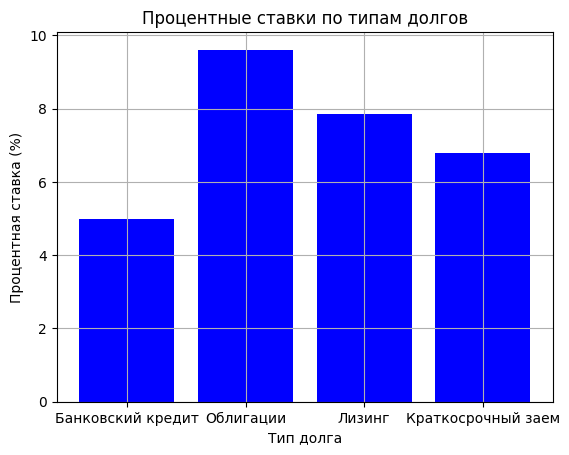

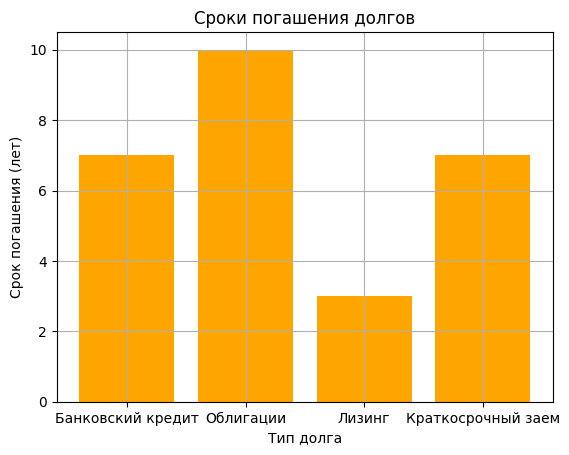

Средняя процентная ставка: 7.31%


In [ ]:
# Генерация данных о долговых обязательствах
np.random.seed(42)
debt_types = ['Банковский кредит', 'Облигации', 'Лизинг', 'Краткосрочный заем']
data = pd.DataFrame({
    'Debt_Type': debt_types,
    'Interest_Rate': np.random.uniform(2, 10, len(debt_types)),  # процентные ставки от 2% до 10%
    'Repayment_Term': np.random.randint(1, 15, len(debt_types))  # срок погашения от 1 до 15 лет
})

# Визуализация процентных ставок
plt.bar(data['Debt_Type'], data['Interest_Rate'], color='blue')
plt.title('Процентные ставки по типам долгов')
plt.xlabel('Тип долга')
plt.ylabel('Процентная ставка (%)')
plt.grid(True)
plt.show()

# Визуализация сроков погашения
plt.bar(data['Debt_Type'], data['Repayment_Term'], color='orange')
plt.title('Сроки погашения долгов')
plt.xlabel('Тип долга')
plt.ylabel('Срок погашения (лет)')
plt.grid(True)
plt.show()

# Средняя процентная ставка
average_interest_rate = data['Interest_Rate'].mean()
print(f"Средняя процентная ставка: {average_interest_rate:.2f}%")

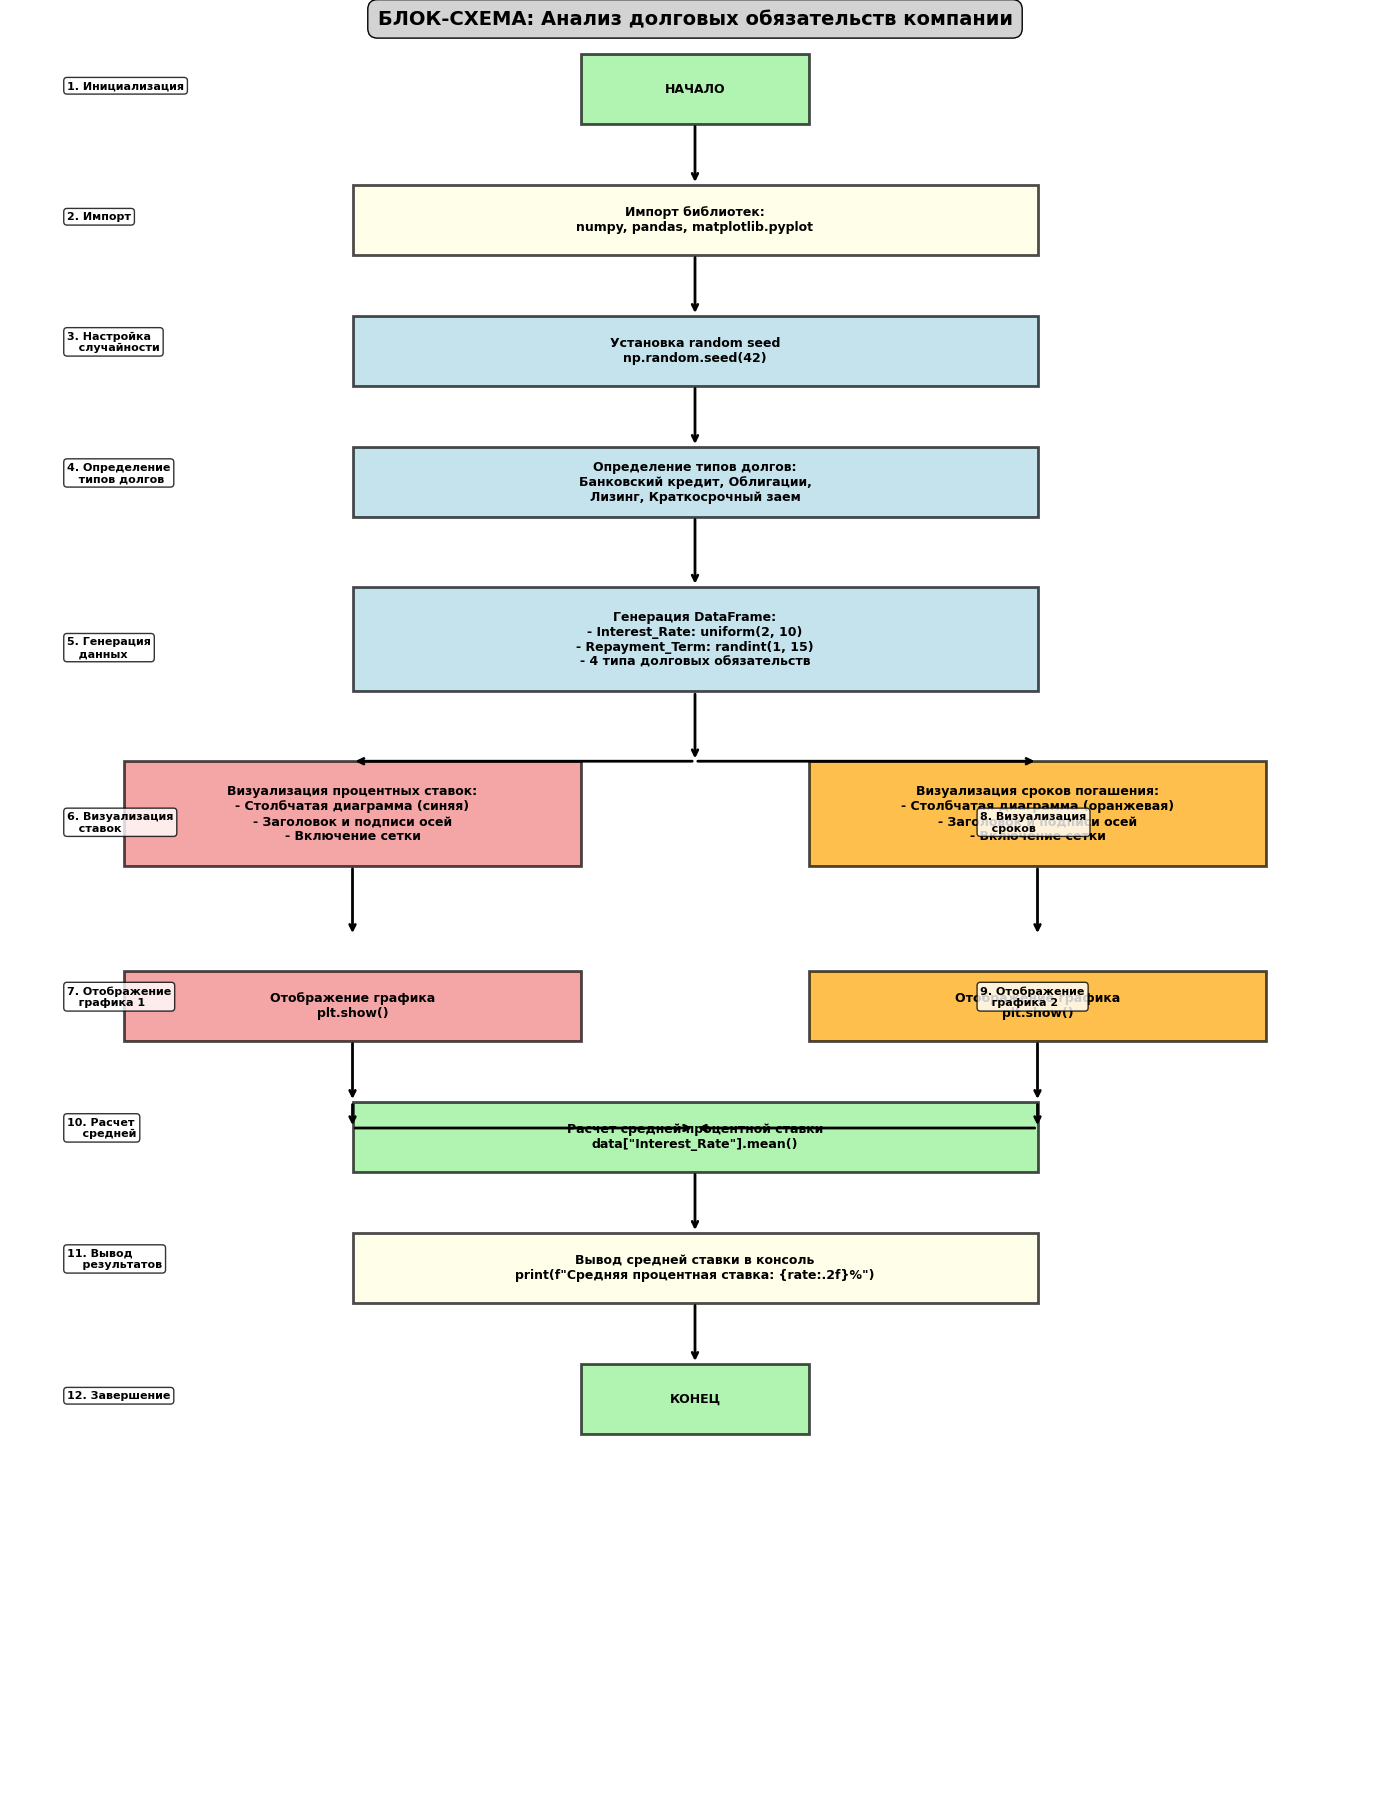

ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ долговых обязательств
1. [НАЧАЛО]
   ↓
2. Импорт библиотек:
   - numpy as np
   - pandas as pd
   - matplotlib.pyplot as plt
   ↓
3. Установка random seed:
   - np.random.seed(42) для воспроизводимости
   ↓
4. Определение типов долговых обязательств:
   - Банковский кредит
   - Облигации
   - Лизинг
   - Краткосрочный заем
   ↓
5. Генерация тестовых данных:
   - Interest_Rate: равномерное распределение [2%, 10%]
   - Repayment_Term: случайные целые [1, 15] лет
   - Создание DataFrame с 4 записями
   ↓
6. ПАРАЛЛЕЛЬНЫЕ ПРОЦЕССЫ:

   ЛЕВЫЙ ПОТОК (Процентные ставки):
   6.1. Создание столбчатой диаграммы:
        - Данные: Interest_Rate по Debt_Type
        - Цвет: синий
        - Заголовок: 'Процентные ставки по типам долгов'
        - Сетка: включена
   ↓
   6.2. Отображение графика: plt.show()

   ПРАВЫЙ ПОТОК (Сроки погашения):
   6.3. Создание столбчатой диаграммы:
        - Данные: Repayment_Term по Debt_Type
        - Цвет: оранжевый
        - 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создание фигуры и оси
fig, ax = plt.subplots(1, 1, figsize=(14, 18))
ax.set_xlim(0, 12)
ax.set_ylim(0, 20)
ax.axis('off')

# Функция для добавления блоков
def add_block(x, y, width, height, text, shape='rectangle', color='lightblue'):
    if shape == 'rectangle':
        rect = patches.Rectangle((x, y), width, height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
    elif shape == 'diamond':
        diamond = patches.RegularPolygon((x + width/2, y + height/2), 4, height/2,
                                       linewidth=2, edgecolor='black',
                                       facecolor=color, alpha=0.7)
        ax.add_patch(diamond)

    # Добавление текста
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=9, fontweight='bold')

# Функция для добавления стрелок
def add_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Блоки блок-схемы
blocks = [
    # Начало
    (5, 19, 2, 0.8, 'НАЧАЛО', 'rectangle', 'lightgreen'),

    # Импорт библиотек
    (3, 17.5, 6, 0.8, 'Импорт библиотек:\nnumpy, pandas, matplotlib.pyplot', 'rectangle', 'lightyellow'),

    # Установка seed
    (3, 16, 6, 0.8, 'Установка random seed\nnp.random.seed(42)', 'rectangle', 'lightblue'),

    # Определение типов долгов
    (3, 14.5, 6, 0.8, 'Определение типов долгов:\nБанковский кредит, Облигации,\nЛизинг, Краткосрочный заем', 'rectangle', 'lightblue'),

    # Генерация данных
    (3, 12.5, 6, 1.2, 'Генерация DataFrame:\n- Interest_Rate: uniform(2, 10)\n- Repayment_Term: randint(1, 15)\n- 4 типа долговых обязательств', 'rectangle', 'lightblue'),

    # Визуализация процентных ставок
    (1, 10.5, 4, 1.2, 'Визуализация процентных ставок:\n- Столбчатая диаграмма (синяя)\n- Заголовок и подписи осей\n- Включение сетки', 'rectangle', 'lightcoral'),

    # Отображение первого графика
    (1, 8.5, 4, 0.8, 'Отображение графика\nplt.show()', 'rectangle', 'lightcoral'),

    # Визуализация сроков погашения
    (7, 10.5, 4, 1.2, 'Визуализация сроков погашения:\n- Столбчатая диаграмма (оранжевая)\n- Заголовок и подписи осей\n- Включение сетки', 'rectangle', 'orange'),

    # Отображение второго графика
    (7, 8.5, 4, 0.8, 'Отображение графика\nplt.show()', 'rectangle', 'orange'),

    # Расчет средней ставки
    (3, 7, 6, 0.8, 'Расчет средней процентной ставки\ndata["Interest_Rate"].mean()', 'rectangle', 'lightgreen'),

    # Вывод результата
    (3, 5.5, 6, 0.8, 'Вывод средней ставки в консоль\nprint(f"Средняя процентная ставка: {rate:.2f}%")', 'rectangle', 'lightyellow'),

    # Конец
    (5, 4, 2, 0.8, 'КОНЕЦ', 'rectangle', 'lightgreen'),
]

# Добавление блоков
for block in blocks:
    add_block(*block)

# Добавление стрелок
arrows = [
    # Основной поток
    (6, 19, 6, 18.3),    # Начало -> Импорт
    (6, 17.5, 6, 16.8),  # Импорт -> Seed
    (6, 16, 6, 15.3),    # Seed -> Типы долгов
    (6, 14.5, 6, 13.7),  # Типы -> Генерация данных

    # Разделение на два графика
    (6, 12.5, 6, 11.7),  # Генерация -> разделение
    (6, 11.7, 3, 11.7),  # К левому графику
    (6, 11.7, 9, 11.7),  # К правому графику

    # Левый поток (процентные ставки)
    (3, 10.5, 3, 9.7),   # Визуализация -> Отображение
    (3, 8.5, 3, 7.8),    # Отображение -> объединение

    # Правый поток (сроки погашения)
    (9, 10.5, 9, 9.7),   # Визуализация -> Отображение
    (9, 8.5, 9, 7.8),    # Отображение -> объединение

    # Объединение потоков
    (3, 7.8, 3, 7.5),    # От левого
    (9, 7.8, 9, 7.5),    # От правого
    (3, 7.5, 6, 7.5),    # К центру
    (9, 7.5, 6, 7.5),    # К центру

    # Продолжение основного потока
    (6, 7, 6, 6.3),      # Расчет -> Вывод
    (6, 5.5, 6, 4.8),    # Вывод -> Конец
]

for arrow in arrows:
    add_arrow(*arrow)

# Добавление подписей этапов
stages = [
    (0.5, 19.4, '1. Инициализация'),
    (0.5, 17.9, '2. Импорт'),
    (0.5, 16.4, '3. Настройка\n   случайности'),
    (0.5, 14.9, '4. Определение\n   типов долгов'),
    (0.5, 12.9, '5. Генерация\n   данных'),
    (0.5, 10.9, '6. Визуализация\n   ставок'),
    (0.5, 8.9, '7. Отображение\n   графика 1'),
    (8.5, 10.9, '8. Визуализация\n   сроков'),
    (8.5, 8.9, '9. Отображение\n   графика 2'),
    (0.5, 7.4, '10. Расчет\n    средней'),
    (0.5, 5.9, '11. Вывод\n    результатов'),
    (0.5, 4.4, '12. Завершение'),
]

for stage in stages:
    ax.text(stage[0], stage[1], stage[2], fontsize=8, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Заголовок
ax.text(6, 20.2, 'БЛОК-СХЕМА: Анализ долговых обязательств компании',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: текстовая блок-схема
print("=" * 70)
print("ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ долговых обязательств")
print("=" * 70)
print("1. [НАЧАЛО]")
print("   ↓")
print("2. Импорт библиотек:")
print("   - numpy as np")
print("   - pandas as pd")
print("   - matplotlib.pyplot as plt")
print("   ↓")
print("3. Установка random seed:")
print("   - np.random.seed(42) для воспроизводимости")
print("   ↓")
print("4. Определение типов долговых обязательств:")
print("   - Банковский кредит")
print("   - Облигации")
print("   - Лизинг")
print("   - Краткосрочный заем")
print("   ↓")
print("5. Генерация тестовых данных:")
print("   - Interest_Rate: равномерное распределение [2%, 10%]")
print("   - Repayment_Term: случайные целые [1, 15] лет")
print("   - Создание DataFrame с 4 записями")
print("   ↓")
print("6. ПАРАЛЛЕЛЬНЫЕ ПРОЦЕССЫ:")
print("")
print("   ЛЕВЫЙ ПОТОК (Процентные ставки):")
print("   6.1. Создание столбчатой диаграммы:")
print("        - Данные: Interest_Rate по Debt_Type")
print("        - Цвет: синий")
print("        - Заголовок: 'Процентные ставки по типам долгов'")
print("        - Сетка: включена")
print("   ↓")
print("   6.2. Отображение графика: plt.show()")
print("")
print("   ПРАВЫЙ ПОТОК (Сроки погашения):")
print("   6.3. Создание столбчатой диаграммы:")
print("        - Данные: Repayment_Term по Debt_Type")
print("        - Цвет: оранжевый")
print("        - Заголовок: 'Сроки погашения долгов'")
print("        - Сетка: включена")
print("   ↓")
print("   6.4. Отображение графика: plt.show()")
print("")
print("   ↓ (объединение потоков)")
print("7. Расчет среднего значения:")
print("   - data['Interest_Rate'].mean()")
print("   - Вычисление средней процентной ставки")
print("   ↓")
print("8. Вывод результатов в консоль:")
print("   - Форматированный вывод с округлением до 2 знаков")
print("   - Пример: 'Средняя процентная ставка: 6.45%'")
print("   ↓")
print("9. [КОНЕЦ]")

**Генерация данных:**

Для каждого типа долга генерируются случайные процентные ставки и сроки погашения, что позволяет провести аудит финансовых обязательств компании.

**4. Анализ дебиторской задолженности**

Генерация случайных данных по дебиторской задолженности:

**Решение:**

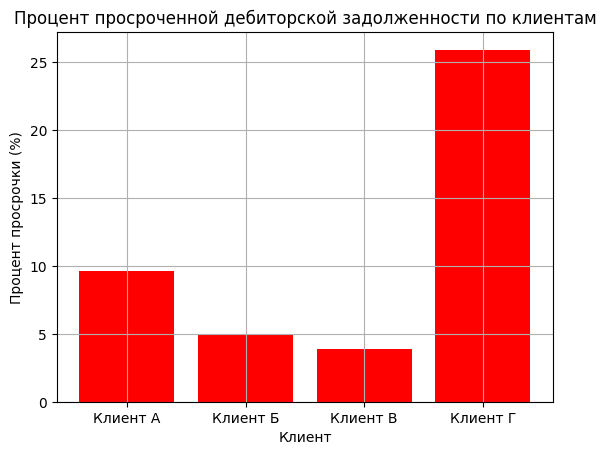

Средний процент просроченной задолженности: 11.10%


In [ ]:
# Генерация данных по дебиторской задолженности
np.random.seed(42)
customers = ['Клиент А', 'Клиент Б', 'Клиент В', 'Клиент Г']
data = pd.DataFrame({
    'Customer': customers,
    'Total_Receivable': np.random.uniform(100, 500, len(customers)),  # общая задолженность в тыс.
    'Overdue_Amount': np.random.uniform(10, 100, len(customers))  # просроченная задолженность
})

# Расчет процента просроченной задолженности
data['Overdue_Percentage'] = (data['Overdue_Amount'] / data['Total_Receivable']) * 100

# Визуализация просроченной задолженности
plt.bar(data['Customer'], data['Overdue_Percentage'], color='red')
plt.title('Процент просроченной дебиторской задолженности по клиентам')
plt.xlabel('Клиент')
plt.ylabel('Процент просрочки (%)')
plt.grid(True)
plt.show()

# Средний процент просроченной задолженности
average_overdue = data['Overdue_Percentage'].mean()
print(f"Средний процент просроченной задолженности: {average_overdue:.2f}%")

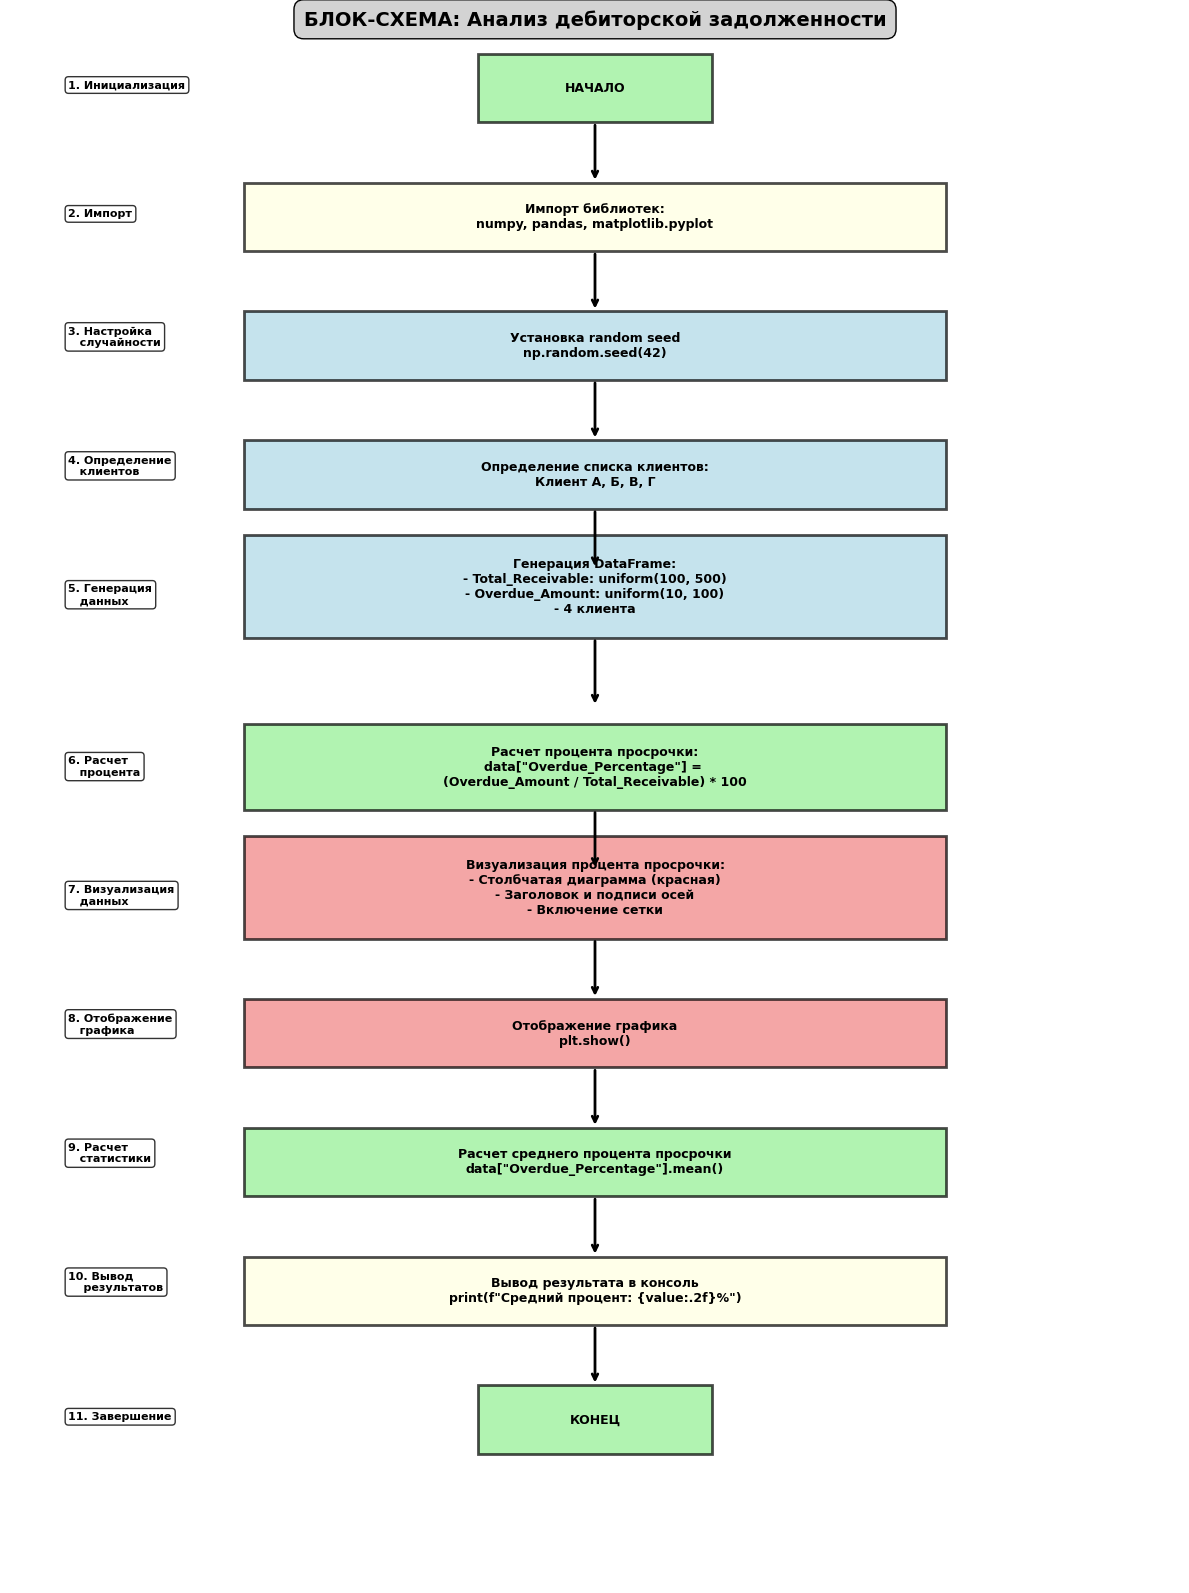

ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ дебиторской задолженности
1. [НАЧАЛО]
   ↓
2. Импорт библиотек:
   - numpy as np
   - pandas as pd
   - matplotlib.pyplot as plt
   ↓
3. Установка random seed:
   - np.random.seed(42) для воспроизводимости результатов
   ↓
4. Определение списка клиентов:
   - Клиент А
   - Клиент Б
   - Клиент В
   - Клиент Г
   ↓
5. Генерация тестовых данных:
   - Total_Receivable: общая задолженность [100, 500] тыс.
   - Overdue_Amount: просроченная задолженность [10, 100] тыс.
   - Создание DataFrame с 4 клиентами
   ↓
6. Расчет процента просроченной задолженности:
   - Формула: (Overdue_Amount / Total_Receivable) * 100
   - Добавление нового столбца 'Overdue_Percentage'
   - Расчет для каждого клиента отдельно
   ↓
7. Визуализация данных:
   - Тип: столбчатая диаграмма
   - Данные: Overdue_Percentage по клиентам
   - Цвет: красный (акцент на проблемных показателях)
   - Заголовок: 'Процент просроченной дебиторской задолженности по клиентам'
   - Сетка: включен

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создание фигуры и оси
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.set_xlim(0, 10)
ax.set_ylim(0, 18)
ax.axis('off')

# Функция для добавления блоков
def add_block(x, y, width, height, text, shape='rectangle', color='lightblue'):
    if shape == 'rectangle':
        rect = patches.Rectangle((x, y), width, height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
    elif shape == 'diamond':
        diamond = patches.RegularPolygon((x + width/2, y + height/2), 4, height/2,
                                       linewidth=2, edgecolor='black',
                                       facecolor=color, alpha=0.7)
        ax.add_patch(diamond)

    # Добавление текста
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=9, fontweight='bold')

# Функция для добавления стрелок
def add_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Блоки блок-схемы
blocks = [
    # Начало
    (4, 17, 2, 0.8, 'НАЧАЛО', 'rectangle', 'lightgreen'),

    # Импорт библиотек
    (2, 15.5, 6, 0.8, 'Импорт библиотек:\nnumpy, pandas, matplotlib.pyplot', 'rectangle', 'lightyellow'),

    # Установка seed
    (2, 14, 6, 0.8, 'Установка random seed\nnp.random.seed(42)', 'rectangle', 'lightblue'),

    # Определение клиентов
    (2, 12.5, 6, 0.8, 'Определение списка клиентов:\nКлиент А, Б, В, Г', 'rectangle', 'lightblue'),

    # Генерация данных
    (2, 11, 6, 1.2, 'Генерация DataFrame:\n- Total_Receivable: uniform(100, 500)\n- Overdue_Amount: uniform(10, 100)\n- 4 клиента', 'rectangle', 'lightblue'),

    # Расчет процента просрочки
    (2, 9, 6, 1.0, 'Расчет процента просрочки:\ndata["Overdue_Percentage"] = \n(Overdue_Amount / Total_Receivable) * 100', 'rectangle', 'lightgreen'),

    # Визуализация данных
    (2, 7.5, 6, 1.2, 'Визуализация процента просрочки:\n- Столбчатая диаграмма (красная)\n- Заголовок и подписи осей\n- Включение сетки', 'rectangle', 'lightcoral'),

    # Отображение графика
    (2, 6, 6, 0.8, 'Отображение графика\nplt.show()', 'rectangle', 'lightcoral'),

    # Расчет средней просрочки
    (2, 4.5, 6, 0.8, 'Расчет среднего процента просрочки\ndata["Overdue_Percentage"].mean()', 'rectangle', 'lightgreen'),

    # Вывод результата
    (2, 3, 6, 0.8, 'Вывод результата в консоль\nprint(f"Средний процент: {value:.2f}%")', 'rectangle', 'lightyellow'),

    # Конец
    (4, 1.5, 2, 0.8, 'КОНЕЦ', 'rectangle', 'lightgreen'),
]

# Добавление блоков
for block in blocks:
    add_block(*block)

# Добавление стрелок
arrows = [
    # Вертикальные стрелки
    (5, 17, 5, 16.3),    # Начало -> Импорт
    (5, 15.5, 5, 14.8),  # Импорт -> Seed
    (5, 14, 5, 13.3),    # Seed -> Клиенты
    (5, 12.5, 5, 11.8),  # Клиенты -> Генерация
    (5, 11, 5, 10.2),    # Генерация -> Расчет %
    (5, 9, 5, 8.3),      # Расчет % -> Визуализация
    (5, 7.5, 5, 6.8),    # Визуализация -> Отображение
    (5, 6, 5, 5.3),      # Отображение -> Расчет среднего
    (5, 4.5, 5, 3.8),    # Расчет среднего -> Вывод
    (5, 3, 5, 2.3),      # Вывод -> Конец
]

for arrow in arrows:
    add_arrow(*arrow)

# Добавление подписей этапов
stages = [
    (0.5, 17.4, '1. Инициализация'),
    (0.5, 15.9, '2. Импорт'),
    (0.5, 14.4, '3. Настройка\n   случайности'),
    (0.5, 12.9, '4. Определение\n   клиентов'),
    (0.5, 11.4, '5. Генерация\n   данных'),
    (0.5, 9.4, '6. Расчет\n   процента'),
    (0.5, 7.9, '7. Визуализация\n   данных'),
    (0.5, 6.4, '8. Отображение\n   графика'),
    (0.5, 4.9, '9. Расчет\n   статистики'),
    (0.5, 3.4, '10. Вывод\n    результатов'),
    (0.5, 1.9, '11. Завершение'),
]

for stage in stages:
    ax.text(stage[0], stage[1], stage[2], fontsize=8, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Заголовок
ax.text(5, 18.2, 'БЛОК-СХЕМА: Анализ дебиторской задолженности',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: текстовая блок-схема
print("=" * 70)
print("ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ дебиторской задолженности")
print("=" * 70)
print("1. [НАЧАЛО]")
print("   ↓")
print("2. Импорт библиотек:")
print("   - numpy as np")
print("   - pandas as pd")
print("   - matplotlib.pyplot as plt")
print("   ↓")
print("3. Установка random seed:")
print("   - np.random.seed(42) для воспроизводимости результатов")
print("   ↓")
print("4. Определение списка клиентов:")
print("   - Клиент А")
print("   - Клиент Б")
print("   - Клиент В")
print("   - Клиент Г")
print("   ↓")
print("5. Генерация тестовых данных:")
print("   - Total_Receivable: общая задолженность [100, 500] тыс.")
print("   - Overdue_Amount: просроченная задолженность [10, 100] тыс.")
print("   - Создание DataFrame с 4 клиентами")
print("   ↓")
print("6. Расчет процента просроченной задолженности:")
print("   - Формула: (Overdue_Amount / Total_Receivable) * 100")
print("   - Добавление нового столбца 'Overdue_Percentage'")
print("   - Расчет для каждого клиента отдельно")
print("   ↓")
print("7. Визуализация данных:")
print("   - Тип: столбчатая диаграмма")
print("   - Данные: Overdue_Percentage по клиентам")
print("   - Цвет: красный (акцент на проблемных показателях)")
print("   - Заголовок: 'Процент просроченной дебиторской задолженности по клиентам'")
print("   - Сетка: включена для лучшей читаемости")
print("   ↓")
print("8. Отображение графика:")
print("   - plt.show()")
print("   - Визуализация распределения процента просрочки")
print("   ↓")
print("9. Расчет сводной статистики:")
print("   - data['Overdue_Percentage'].mean()")
print("   - Вычисление среднего значения по всем клиентам")
print("   ↓")
print("10. Вывод результатов в консоль:")
print("    - Форматированный вывод с округлением до 2 знаков после запятой")
print("    - Пример: 'Средний процент просроченной задолженности: 25.67%'")
print("    - Информация для принятия управленческих решений")
print("   ↓")
print("11. [КОНЕЦ]")

**Генерация данных:**

Генерируются случайные суммы общей дебиторской задолженности и просроченной задолженности для нескольких клиентов, что позволяет проанализировать кредитные риски компании.

**5. Оценка эффективности затрат и прибыли по подразделениям компании**

Генерация случайных данных по эффективности подразделений:

**Решение:**

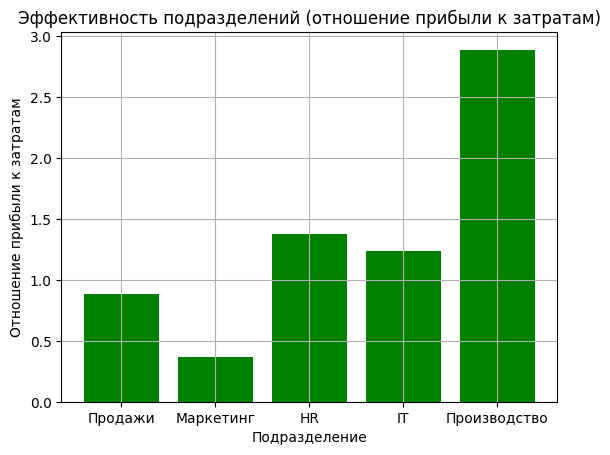

Наиболее эффективное подразделение: Производство


In [ ]:
# Генерация данных по подразделениям
np.random.seed(42)
departments = ['Продажи', 'Маркетинг', 'HR', 'IT', 'Производство']
data = pd.DataFrame({
    'Department': departments,
    'Costs': np.random.uniform(100, 500, len(departments)),  # затраты в тыс.
    'Profit': np.random.uniform(150, 600, len(departments))  # прибыль в тыс.
})

# Вычисление отношения прибыли к затратам
data['Profit_to_Cost_Ratio'] = data['Profit'] / data['Costs']

# Визуализация эффективности подразделений
plt.bar(data['Department'], data['Profit_to_Cost_Ratio'], color='green')
plt.title('Эффективность подразделений (отношение прибыли к затратам)')
plt.xlabel('Подразделение')
plt.ylabel('Отношение прибыли к затратам')
plt.grid(True)
plt.show()

# Подразделение с максимальной эффективностью
most_efficient_department = data.loc[data['Profit_to_Cost_Ratio'].idxmax()]
print(f"Наиболее эффективное подразделение: {most_efficient_department['Department']}")

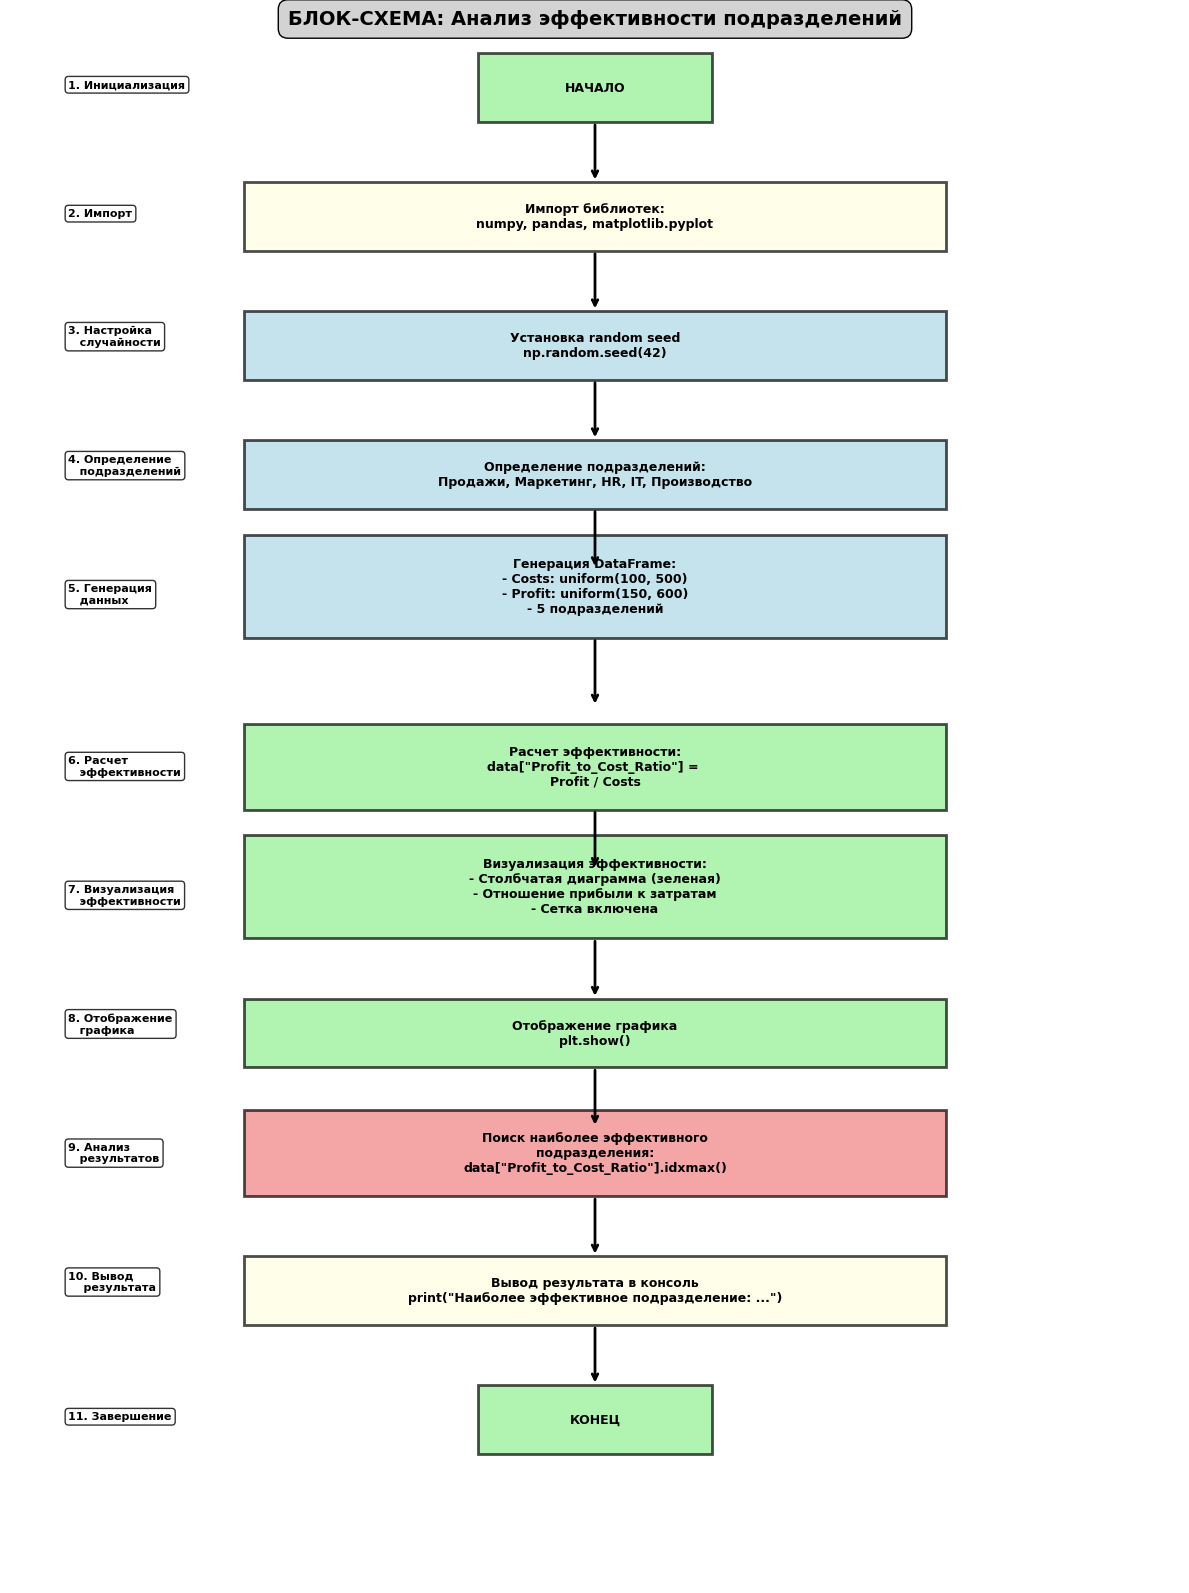

ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ эффективности подразделений
1. [НАЧАЛО]
   ↓
2. Импорт библиотек:
   - numpy as np
   - pandas as pd
   - matplotlib.pyplot as plt
   ↓
3. Установка random seed:
   - np.random.seed(42) для воспроизводимости результатов
   ↓
4. Определение подразделений компании:
   - Продажи
   - Маркетинг
   - HR
   - IT
   - Производство
   ↓
5. Генерация тестовых данных:
   - Costs: затраты подразделений [100, 500] тыс.
   - Profit: прибыль подразделений [150, 600] тыс.
   - Создание DataFrame с 5 подразделениями
   ↓
6. Расчет показателя эффективности:
   - Формула: Profit_to_Cost_Ratio = Profit / Costs
   - Ключевой метрики ROI (Return on Investment)
   - Показывает, сколько прибыли генерируется на 1 единицу затрат
   ↓
7. Визуализация эффективности подразделений:
   - Тип: столбчатая диаграмма
   - Данные: Profit_to_Cost_Ratio по подразделениям
   - Цвет: зеленый (символизирует эффективность и рост)
   - Заголовок: 'Эффективность подразделений (отношение пр

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создание фигуры и оси
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.set_xlim(0, 10)
ax.set_ylim(0, 18)
ax.axis('off')

# Функция для добавления блоков
def add_block(x, y, width, height, text, shape='rectangle', color='lightblue'):
    if shape == 'rectangle':
        rect = patches.Rectangle((x, y), width, height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
    elif shape == 'diamond':
        diamond = patches.RegularPolygon((x + width/2, y + height/2), 4, height/2,
                                       linewidth=2, edgecolor='black',
                                       facecolor=color, alpha=0.7)
        ax.add_patch(diamond)

    # Добавление текста
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=9, fontweight='bold')

# Функция для добавления стрелок
def add_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Блоки блок-схемы
blocks = [
    # Начало
    (4, 17, 2, 0.8, 'НАЧАЛО', 'rectangle', 'lightgreen'),

    # Импорт библиотек
    (2, 15.5, 6, 0.8, 'Импорт библиотек:\nnumpy, pandas, matplotlib.pyplot', 'rectangle', 'lightyellow'),

    # Установка seed
    (2, 14, 6, 0.8, 'Установка random seed\nnp.random.seed(42)', 'rectangle', 'lightblue'),

    # Определение подразделений
    (2, 12.5, 6, 0.8, 'Определение подразделений:\nПродажи, Маркетинг, HR, IT, Производство', 'rectangle', 'lightblue'),

    # Генерация данных
    (2, 11, 6, 1.2, 'Генерация DataFrame:\n- Costs: uniform(100, 500)\n- Profit: uniform(150, 600)\n- 5 подразделений', 'rectangle', 'lightblue'),

    # Расчет эффективности
    (2, 9, 6, 1.0, 'Расчет эффективности:\ndata["Profit_to_Cost_Ratio"] = \nProfit / Costs', 'rectangle', 'lightgreen'),

    # Визуализация эффективности
    (2, 7.5, 6, 1.2, 'Визуализация эффективности:\n- Столбчатая диаграмма (зеленая)\n- Отношение прибыли к затратам\n- Сетка включена', 'rectangle', 'lightgreen'),

    # Отображение графика
    (2, 6, 6, 0.8, 'Отображение графика\nplt.show()', 'rectangle', 'lightgreen'),

    # Поиск максимальной эффективности
    (2, 4.5, 6, 1.0, 'Поиск наиболее эффективного\nподразделения:\ndata["Profit_to_Cost_Ratio"].idxmax()', 'rectangle', 'lightcoral'),

    # Вывод результата
    (2, 3, 6, 0.8, 'Вывод результата в консоль\nprint("Наиболее эффективное подразделение: ...")', 'rectangle', 'lightyellow'),

    # Конец
    (4, 1.5, 2, 0.8, 'КОНЕЦ', 'rectangle', 'lightgreen'),
]

# Добавление блоков
for block in blocks:
    add_block(*block)

# Добавление стрелок
arrows = [
    # Вертикальные стрелки
    (5, 17, 5, 16.3),    # Начало -> Импорт
    (5, 15.5, 5, 14.8),  # Импорт -> Seed
    (5, 14, 5, 13.3),    # Seed -> Подразделения
    (5, 12.5, 5, 11.8),  # Подразделения -> Генерация
    (5, 11, 5, 10.2),    # Генерация -> Расчет эффективности
    (5, 9, 5, 8.3),      # Расчет эффективности -> Визуализация
    (5, 7.5, 5, 6.8),    # Визуализация -> Отображение
    (5, 6, 5, 5.3),      # Отображение -> Поиск максимума
    (5, 4.5, 5, 3.8),    # Поиск максимума -> Вывод
    (5, 3, 5, 2.3),      # Вывод -> Конец
]

for arrow in arrows:
    add_arrow(*arrow)

# Добавление подписей этапов
stages = [
    (0.5, 17.4, '1. Инициализация'),
    (0.5, 15.9, '2. Импорт'),
    (0.5, 14.4, '3. Настройка\n   случайности'),
    (0.5, 12.9, '4. Определение\n   подразделений'),
    (0.5, 11.4, '5. Генерация\n   данных'),
    (0.5, 9.4, '6. Расчет\n   эффективности'),
    (0.5, 7.9, '7. Визуализация\n   эффективности'),
    (0.5, 6.4, '8. Отображение\n   графика'),
    (0.5, 4.9, '9. Анализ\n   результатов'),
    (0.5, 3.4, '10. Вывод\n    результата'),
    (0.5, 1.9, '11. Завершение'),
]

for stage in stages:
    ax.text(stage[0], stage[1], stage[2], fontsize=8, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Заголовок
ax.text(5, 18.2, 'БЛОК-СХЕМА: Анализ эффективности подразделений',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: текстовая блок-схема
print("=" * 70)
print("ТЕКСТОВАЯ БЛОК-СХЕМА ПРОГРАММЫ: Анализ эффективности подразделений")
print("=" * 70)
print("1. [НАЧАЛО]")
print("   ↓")
print("2. Импорт библиотек:")
print("   - numpy as np")
print("   - pandas as pd")
print("   - matplotlib.pyplot as plt")
print("   ↓")
print("3. Установка random seed:")
print("   - np.random.seed(42) для воспроизводимости результатов")
print("   ↓")
print("4. Определение подразделений компании:")
print("   - Продажи")
print("   - Маркетинг")
print("   - HR")
print("   - IT")
print("   - Производство")
print("   ↓")
print("5. Генерация тестовых данных:")
print("   - Costs: затраты подразделений [100, 500] тыс.")
print("   - Profit: прибыль подразделений [150, 600] тыс.")
print("   - Создание DataFrame с 5 подразделениями")
print("   ↓")
print("6. Расчет показателя эффективности:")
print("   - Формула: Profit_to_Cost_Ratio = Profit / Costs")
print("   - Ключевой метрики ROI (Return on Investment)")
print("   - Показывает, сколько прибыли генерируется на 1 единицу затрат")
print("   ↓")
print("7. Визуализация эффективности подразделений:")
print("   - Тип: столбчатая диаграмма")
print("   - Данные: Profit_to_Cost_Ratio по подразделениям")
print("   - Цвет: зеленый (символизирует эффективность и рост)")
print("   - Заголовок: 'Эффективность подразделений (отношение прибыли к затратам)'")
print("   - Сетка: включена для сравнения показателей")
print("   ↓")
print("8. Отображение графика:")
print("   - plt.show()")
print("   - Визуальное сравнение эффективности всех подразделений")
print("   ↓")
print("9. Анализ результатов и поиск лидера:")
print("   - data['Profit_to_Cost_Ratio'].idxmax()")
print("   - Поиск индекса максимального значения")
print("   - Извлечение данных самого эффективного подразделения")
print("   ↓")
print("10. Вывод результата в консоль:")
print("    - Форматированный вывод")
print("    - Пример: 'Наиболее эффективное подразделение: Продажи'")
print("    - Информация для стратегического планирования и распределения ресурсов")
print("   ↓")
print("11. [КОНЕЦ]")

**Генерация данных:**

Случайные данные по затратам и прибыли для различных подразделений компании позволяют провести аудит их эффективности.

**Заключение**

Во всех примерах использованы случайные данные, сгенерированные с помощью библиотеки NumPy. Это позволяет тренироваться на данных, максимально приближенных к реальным сценариям в сфере финансового аудита, анализировать аномалии, тренды и риски в деятельности компаний.